In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from sklearn.metrics.pairwise import rbf_kernel
from functools import partial
from scipy.linalg import lstsq

In [3]:
from solvers import prepare_fdm_poisson_solve,prepare_GP_solver,prepare_solve_poisson_fdm_inhomogeneus,prepare_spectral_poisson_solve

sin(4*pi*x)*sin(2*pi*y)
-20*pi**2*sin(4*pi*x)*sin(2*pi*y)


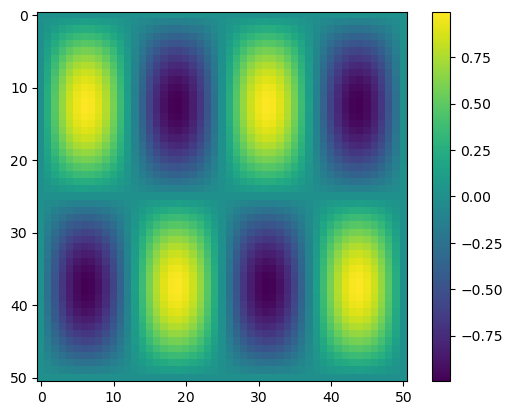

In [4]:

#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')
u=sympy.sin(2*2*sympy.pi*x)*sympy.sin(2*sympy.pi*y)
#u=sin(2*sympy.pi*x*sympy.exp(3*sin(pi*x)))*sin(4*pi*sin(pi*y))
#u=sin(pi*x)*sin(pi*y)
freq_coeff=2
#u=sin((exp(freq_coeff*sin(pi*x))-1))*sin((exp(freq_coeff*sin(pi*y))-1))
assert u.subs(x,0)==0 ,print(u.subs(x,0))
assert u.subs(x,1)==0 ,print(u.subs(x,1))
assert u.subs(y,0)==0 ,print(u.subs(y,0))
assert u.subs(y,1)==0 ,print(u.subs(y,1))
print(u)
uxx=sympy.diff(u,x,x)
uyy=sympy.diff(u,y,y)
print(uxx+uyy)
uxx=sympy.lambdify((x,y),uxx,'numpy')
u=sympy.lambdify((x,y),u,'numpy')
uyy=sympy.lambdify((x,y),uyy,'numpy')

f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])




N_target=50

x = np.linspace(0,1,N_target+1,endpoint=True,dtype=np.float64)
y = np.linspace(0,1,N_target+1,endpoint=True,dtype=np.float64)
X,Y = np.meshgrid(x,y)
u_truth=u(X,Y)


plt.figure()
plt.imshow(u_truth)
plt.colorbar()
plt.show()

In [10]:
solver_fdm_asym_left=prepare_solve_poisson_fdm_inhomogeneus(
    N1=55,
    N2=55,
    L1=0.4,
    L2=0.6)
solver_fdm_asym_right=prepare_solve_poisson_fdm_inhomogeneus(
    N1=55,
    N2=55,
    L1=0.6,
    L2=0.4)
solver_fdm=prepare_fdm_poisson_solve(N=1000)
solver_GP=prepare_GP_solver(N=1000,N_target_fixed=N_target)
solver_spectral=prepare_spectral_poisson_solve(N=100)
solvers=[solver_fdm_asym_left,solver_fdm_asym_right,solver_fdm,solver_GP,solver_spectral]
names=['fdm_asym_left','fdm_asym_right','fdm','GP','spectral']

In [11]:
sols=[]
start=time.time()
for solver,name in zip(solvers,names):
    sols.append(solver(f,N_target))
    print(name,time.time()-start)
    start=time.time()

fdm_asym_left 0.006961345672607422
fdm_asym_right 0.00446319580078125
fdm 0.11589312553405762
GP 0.0013077259063720703
spectral 0.0029299259185791016


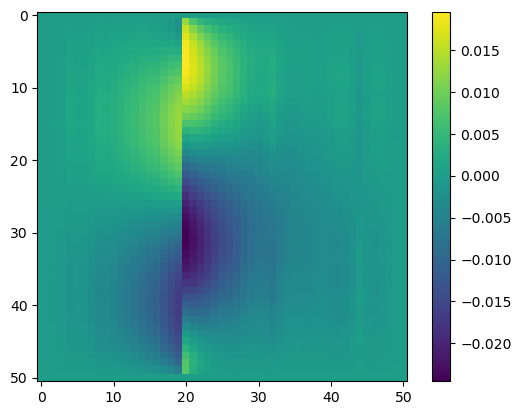

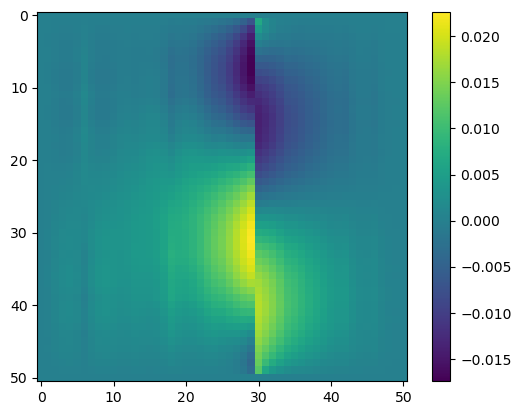

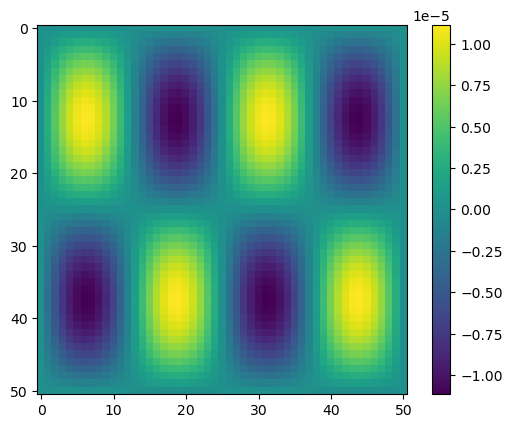

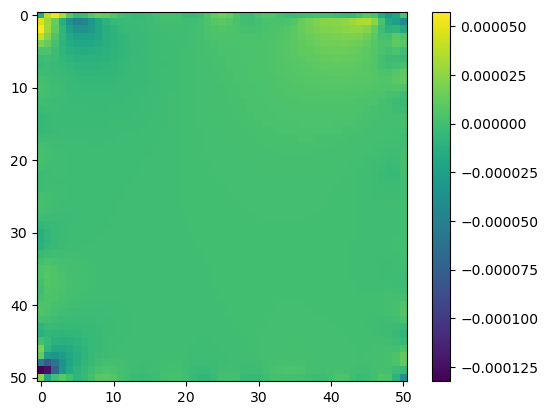

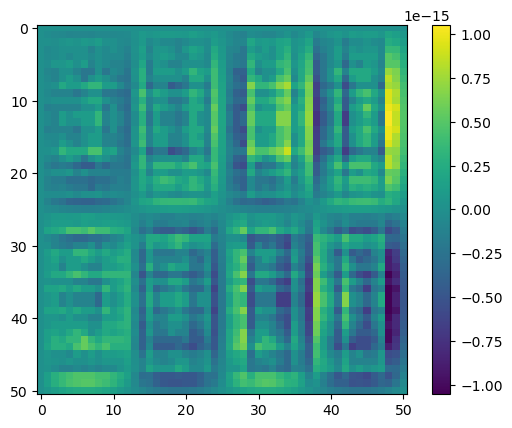

In [12]:
for sol in sols:
    plt.figure()
    plt.imshow(sol-u_truth)
    plt.colorbar()
    plt.show()

In [13]:
def plot_vectorized_function(f,mesh_size=0.01):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0.0, 1.0, mesh_size)
    X, Y = np.meshgrid(x, y)
    Z=f(np.stack([X.flatten(),Y.flatten()],axis=-1)).reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x1')
    ax.set_ylabel('y1')
    return fig

def plot_function(f):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0.0, 1.0, 0.01)
    X, Y = np.meshgrid(x, y)
    zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x1')
    ax.set_ylabel('y1')
    return fig


In [15]:
def vec(theta):
    return np.array([np.cos(theta),np.sin(theta)])
dir=vec(np.random.rand()*2*np.pi)
dir=vec(2*np.pi/4)
point=np.random.rand(2)
#point=np.array([0.5,0.5])

sin(5*exp(-100.0*(x - 0.951602180599454)**2))
-5*(200.0*x - 190.320436119891)*(1000.0*x - 951.602180599454)*exp(-200.0*(x - 0.951602180599454)**2)*sin(5*exp(-100.0*(x - 0.951602180599454)**2)) + (200.0*x - 190.320436119891)*(1000.0*x - 951.602180599454)*exp(-100.0*(x - 0.951602180599454)**2)*cos(5*exp(-100.0*(x - 0.951602180599454)**2)) - 1000.0*exp(-100.0*(x - 0.951602180599454)**2)*cos(5*exp(-100.0*(x - 0.951602180599454)**2))


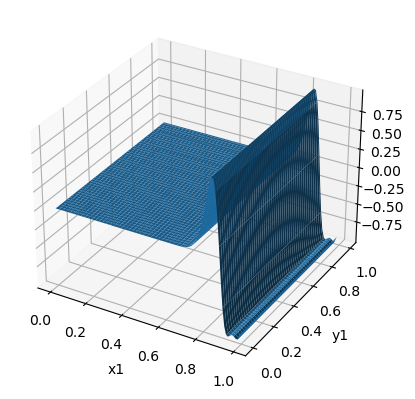

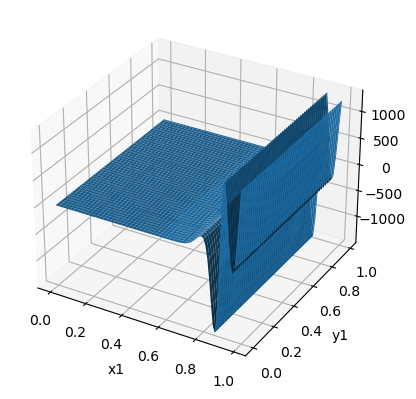

In [16]:
#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')

type1=(1+5/(1+sympy.exp(-10*(x*dir[0]+y*dir[1]-0.5))))*(5+sympy.sin(4*sympy.pi*(x*dir[1]-y*dir[0])))

moving_spike=sympy.sin(5*sympy.exp(-((x-point[0])**2+(y-point[1])**2)/0.01))
pos=0.05
coeff=200
block=1/(1+sympy.exp(-coeff*(x-pos)))*1/(1+sympy.exp(-coeff*(y-pos)))*1/(1+sympy.exp(coeff*(x-(1-pos))))*1/(1+sympy.exp(coeff*(y-(1-pos))))
left_side_step=1/(1+sympy.exp(-coeff*(x-pos)))*1/(1+sympy.exp(-coeff*(y-pos)))*1/(1+sympy.exp(coeff*(x-(0.3))))*1/(1+sympy.exp(coeff*(y-(1-pos))))
u=sympy.sin(5*sympy.exp(-((x-point[0])**2)/0.01))
#u=sin(2*sympy.pi*x*sympy.exp(3*sin(pi*x)))*sin(4*pi*sin(pi*y))
#u=sin(pi*x)*sin(pi*y)
freq_coeff=2
#u=sin((exp(freq_coeff*sin(pi*x))-1))*sin((exp(freq_coeff*sin(pi*y))-1))

print(u)
uxx=sympy.diff(u,x,x)
uyy=sympy.diff(u,y,y)
print(uxx+uyy)
uxx=sympy.lambdify((x,y),uxx,'numpy')
u=sympy.lambdify((x,y),u,'numpy')
uyy=sympy.lambdify((x,y),uyy,'numpy')

f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])

fig = plot_function(u)
fig2=plot_function(lambda x,y:f((x,y)))

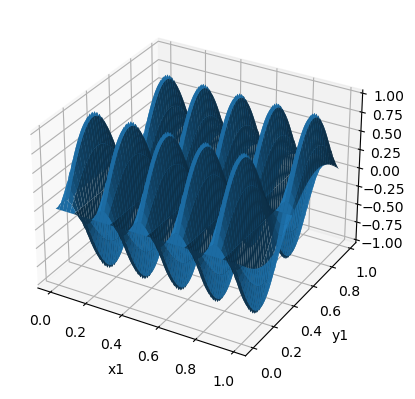

In [17]:
#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')

def make_u_f(range_int=10):
    x,y=sympy.symbols('x y')
    u=sympy.sin(np.random.randint(1,range_int)*2*sympy.pi*x)*sympy.sin(np.random.randint(1,range_int)*2*sympy.pi*y)
    uxx=sympy.diff(u,x,x)
    uyy=sympy.diff(u,y,y)
    uxx=sympy.lambdify((x,y),uxx,'numpy')
    u=sympy.lambdify((x,y),u,'numpy')
    uyy=sympy.lambdify((x,y),uyy,'numpy')
    f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])
    return u,f

def sample_from_u(u,N):
    x = np.linspace(0,1,N+1,endpoint=True,dtype=np.float64)
    y = np.linspace(0,1,N+1,endpoint=True,dtype=np.float64)
    X,Y = np.meshgrid(x,y)
    return u(X,Y)

u,f=make_u_f()
fig = plot_function(u)

In [18]:
UF=[make_u_f() for _ in range(100)]
U=np.stack([uf[0] for uf in UF],axis=0)
F=np.stack([uf[1] for uf in UF],axis=0)


Y=np.stack([sample_from_u(u_i,N_target) for u_i in U],axis=0)


In [19]:
Y.shape

(100, 51, 51)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)

In [21]:
pca.fit(Y.reshape(Y.shape[0],-1))

PCA(n_components=60)

In [22]:
print(pca.explained_variance_ratio_)

[4.08496732e-02 3.94487674e-02 3.06372549e-02 3.06372549e-02
 3.06372549e-02 3.06372549e-02 3.06372549e-02 3.06372549e-02
 3.06372549e-02 2.70725558e-02 2.04248366e-02 2.04248366e-02
 2.04248366e-02 2.04248366e-02 2.04248366e-02 2.04248366e-02
 2.04248366e-02 2.04248366e-02 2.04248366e-02 2.04248366e-02
 2.04248366e-02 2.04248366e-02 2.04248366e-02 2.04248366e-02
 2.04248366e-02 2.04248366e-02 2.04248366e-02 1.43610298e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 1.02124183e-02
 1.02124183e-02 1.02124183e-02 1.02124183e-02 4.18797205e-33]


In [23]:
Y_components=pca.transform(Y.reshape(Y.shape[0],-1))

In [24]:
model_values=np.stack([np.stack([solver(f,N_target=N_target) for solver in solvers]) for f in tqdm(F)])
model_transforms=pca.transform(model_values.reshape(model_values.shape[0]*model_values.shape[1],-1)).reshape(model_values.shape[0],model_values.shape[1],60)

  0%|          | 0/100 [00:00<?, ?it/s]

In [25]:
model_transforms.shape

(100, 5, 60)

In [26]:
l=np.sqrt(np.mean([np.linalg.norm(sample_from_u(lambda x,y:fi([x,y]),N_target))**2 for fi in F]))

In [27]:
l

74670.52048752033

In [28]:


def gaussian_separable_kernel(Ffunctions,Gfunctions,mat,l):
    F_vals=np.stack([sample_from_u(lambda x,y:fi([x,y]),N_target) for fi in Ffunctions])
    if Gfunctions is not None:
        G_vals=np.stack([sample_from_u(lambda x,y:fi([x,y]),N_target) for fi in Gfunctions])
    else:
        G_vals=F_vals
    K1=rbf_kernel(F_vals.reshape(F_vals.shape[0],-1),G_vals.reshape(G_vals.shape[0],-1),gamma=1/(2*l**2))

    return K1[:,:,None,None]*mat[None,None,:,:]+1

my_kernel=partial(gaussian_separable_kernel,mat=np.eye(len(solvers)),l=1499440.7651980314)

In [29]:
kernel_matrix=my_kernel(F,None)

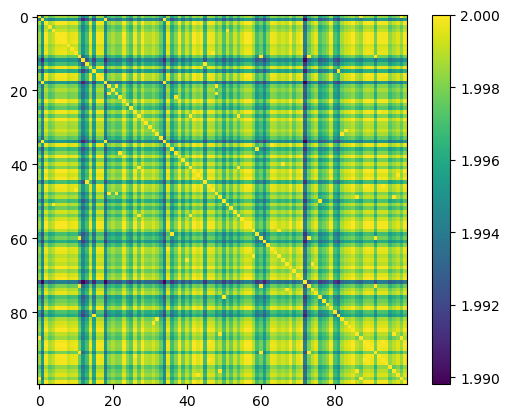

In [30]:
plt.imshow(kernel_matrix[:,:,0,0])
plt.colorbar()

In [31]:
to_invert=np.einsum("ijkl,ikm->ijlm", kernel_matrix, model_transforms)
to_invert = to_invert.reshape(to_invert.shape[0],to_invert.shape[1]*to_invert.shape[2],to_invert.shape[3])

In [32]:
kernel_matrix.shape

(100, 100, 5, 5)

In [33]:
model_transforms.shape

(100, 5, 60)

In [34]:
to_invert.shape

(100, 500, 60)

In [35]:
errors=Y_components[:,None,:]-model_transforms

In [36]:
to_invert_2=np.einsum("ijkl,ikm->ikjlm", kernel_matrix, errors)
to_invert_2=to_invert_2.reshape(to_invert_2.shape[0]*to_invert_2.shape[1],to_invert_2.shape[2]*to_invert_2.shape[3],to_invert_2.shape[4])

In [38]:
def regularized_lstsq(A, y, reg=1e-10):
    A2 = np.concatenate([A, np.sqrt(reg) * np.eye(A.shape[1])], axis=0)
    y2 = np.concatenate([y, np.zeros(A.shape[1])], axis=0)
    return lstsq(A2, y2)[0]

In [39]:
cov_regularizer=10
alpha=1

In [40]:
Vs=[]
for i in range(Y_components.shape[-1]):
    A=np.concatenate(
        [to_invert[:,:,i], np.sqrt(cov_regularizer) * to_invert_2[:,:,i]], axis=0
    )
    Y_to_solve=np.concatenate(
        [Y_components[:,i], np.zeros(to_invert_2.shape[1])], axis=0
    )
    V = regularized_lstsq(
            A, Y_to_solve, reg=alpha * Y_to_solve.shape[0]
        )
    Vs.append(V.reshape(-1, 5))
Vs=np.stack(Vs,axis=-1)

In [41]:
Vs.shape

(100, 5, 60)

In [42]:
UF_to_test=[make_u_f() for _ in range(10)]
U_to_test=np.stack([uf[0] for uf in UF_to_test],axis=0)
F_to_test=np.stack([uf[1] for uf in UF_to_test],axis=0)



In [43]:
Y_components_to_test=pca.transform(np.stack([sample_from_u(u_i,N_target) for u_i in U_to_test],axis=0).reshape(U_to_test.shape[0],-1))

In [44]:
kernel_to_test=my_kernel(F,F_to_test)

In [45]:
model_values_to_test=np.stack([np.stack([solver(f,N_target=N_target) for solver in solvers]) for f in tqdm(F_to_test)])
model_transforms_to_test=pca.transform(model_values_to_test.reshape(model_values_to_test.shape[0]*model_values_to_test.shape[1],-1)).reshape(model_values_to_test.shape[0],model_values_to_test.shape[1],60)

  0%|          | 0/10 [00:00<?, ?it/s]

In [46]:
alpha = np.einsum("ijp,ikjm->mkp", Vs, kernel_to_test)
pred_aggregate = np.einsum("ijp,jip->jp", alpha, model_transforms_to_test)

In [47]:
alpha.shape

(5, 10, 60)

In [48]:
aggregate=pca.inverse_transform(pred_aggregate)

In [49]:
#np.linalg.norm(pred_aggregate-Y_components,axis=-1)

In [50]:
aggregate.shape

(10, 2601)

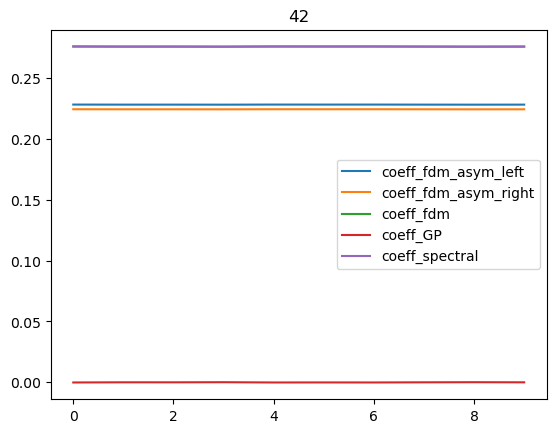

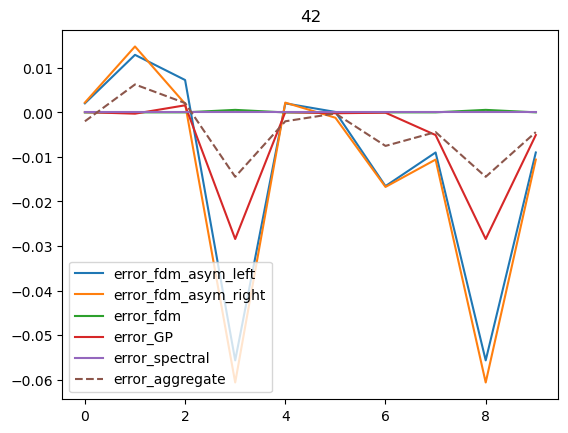

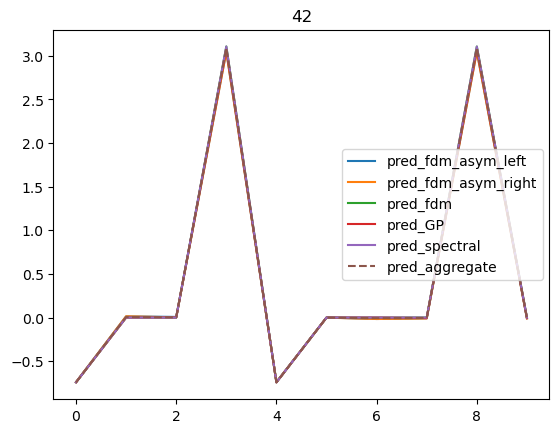

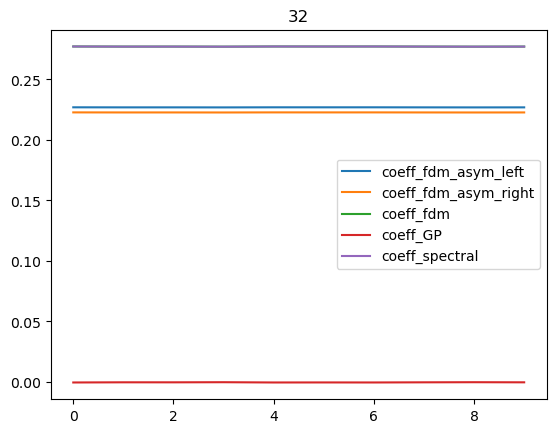

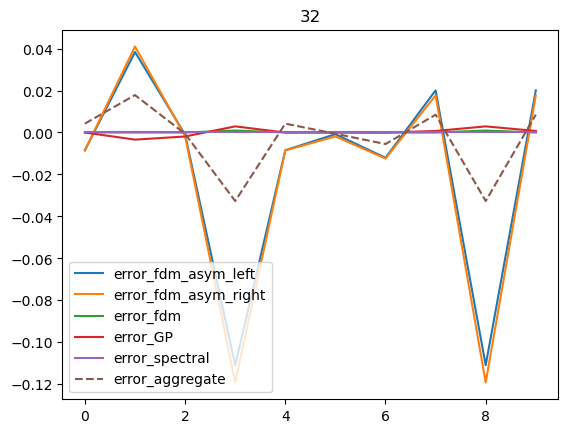

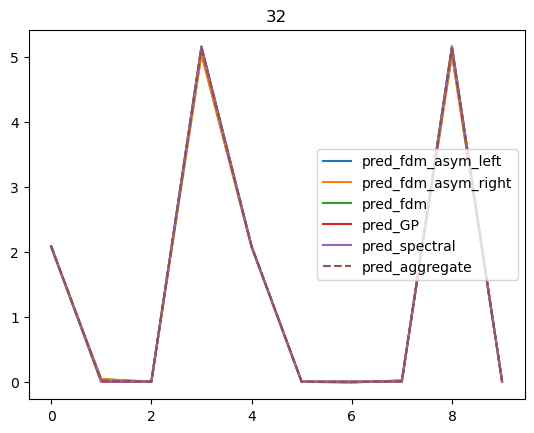

In [51]:
for freq in np.random.randint(0,60,2):
    plt.figure()
    for i in range(5):
        plt.plot(alpha[i,:,freq],label='coeff_'+names[i])
    plt.legend()
    plt.title(f'{freq}')
    plt.figure()
    for i in range(5):
        plt.plot(model_transforms_to_test[:,i,freq]-Y_components_to_test[:,freq],label='error_'+names[i])
    plt.plot(pred_aggregate[:,freq]-Y_components_to_test[:,freq],label='error_aggregate',linestyle='--')
    #plt.ylim(-1,1)
    plt.legend()
    plt.title(f'{freq}')
    plt.figure()
    for i in range(5):
        plt.plot(model_transforms_to_test[:,i,freq],label='pred_'+names[i])
    plt.plot(pred_aggregate[:,freq],label='pred_aggregate',linestyle='--')
    #plt.ylim(-1,1)
    plt.legend()
    plt.title(f'{freq}')

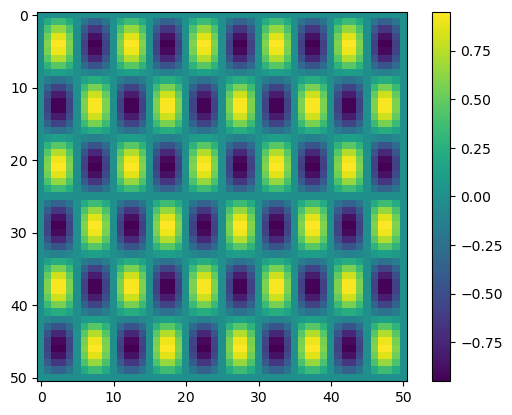

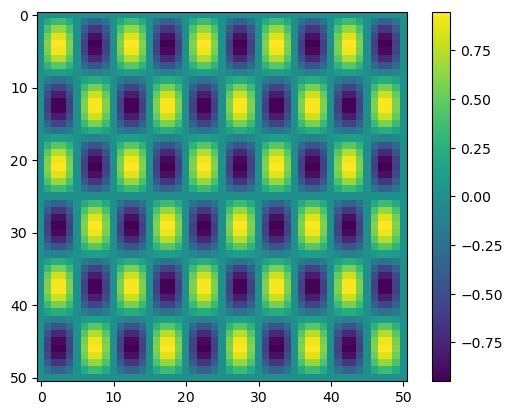

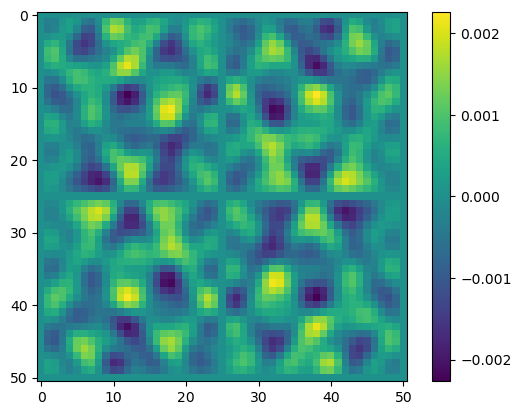

In [52]:
index=5
plt.imshow(aggregate[5].reshape(N_target+1,N_target+1))
plt.colorbar()
plt.figure()
plt.imshow(sample_from_u(U_to_test[5],N_target))
plt.colorbar()
plt.figure()
plt.imshow(aggregate[5].reshape(N_target+1,N_target+1)-sample_from_u(U_to_test[5],N_target))
plt.colorbar()

In [53]:
from aggregate_solvers import Agregator

In [54]:
agg=Agregator(K=my_kernel, solvers=solvers,kernel_name='gaussian',PCA_covariance_ratio=1-1e-6)

In [55]:
agg.fit(F,Y,cov_regularizer=10,alpha=1)

  0%|          | 0/100 [00:00<?, ?it/s]

Component 0 took 0.02779412269592285 seconds
Component 1 took 0.0240325927734375 seconds
Component 2 took 0.02767014503479004 seconds
Component 3 took 0.026627779006958008 seconds
Component 4 took 0.027811050415039062 seconds
Component 5 took 0.02727484703063965 seconds
Component 6 took 0.026028871536254883 seconds
Component 7 took 0.025267839431762695 seconds
Component 8 took 0.024641990661621094 seconds
Component 9 took 0.0286099910736084 seconds
Component 10 took 0.0251920223236084 seconds
Component 11 took 0.025141000747680664 seconds
Component 12 took 0.02364492416381836 seconds
Component 13 took 0.026398181915283203 seconds
Component 14 took 0.031012773513793945 seconds
Component 15 took 0.02911686897277832 seconds
Component 16 took 0.03404688835144043 seconds
Component 17 took 0.032629966735839844 seconds
Component 18 took 0.025058746337890625 seconds
Component 19 took 0.026883840560913086 seconds
Component 20 took 0.02635979652404785 seconds
Component 21 took 0.0298192501068115

[gaussian Agregator](solvers=['<function prepare_solve_poisson_fdm_inhomogeneus.<locals>.solver at 0x120e3b060>', '<function prepare_solve_poisson_fdm_inhomogeneus.<locals>.solver at 0x120e3afc0>', '<function prepare_fdm_poisson_solve.<locals>.solver at 0x120e3aac0>', '<function prepare_GP_solver.<locals>.solver at 0x120e3b2e0>', '<function prepare_spectral_poisson_solve.<locals>.solver at 0x120e3b100>'])

In [56]:
pred_2,alpha_2=agg(F_to_test,True)

  0%|          | 0/10 [00:00<?, ?it/s]

(10, 59) (5, 10, 59) (10, 5, 59)


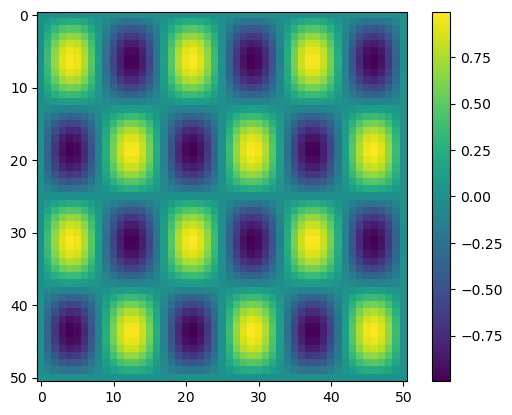

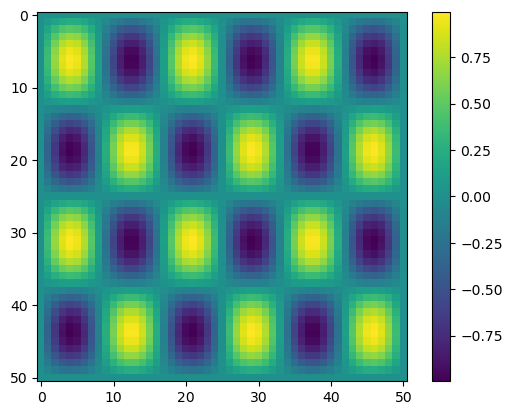

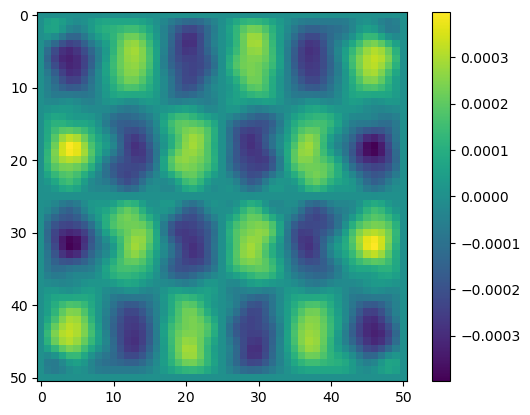

In [57]:
index=0
timestep=index
plt.imshow(pred_2[index].reshape(N_target+1,N_target+1))
plt.colorbar()
plt.figure()
plt.imshow(sample_from_u(U_to_test[index],N_target))
plt.colorbar()
plt.figure()
plt.imshow(pred_2[index].reshape(N_target+1,N_target+1)-sample_from_u(U_to_test[index],N_target))
plt.colorbar()

In [58]:
pred_2_components=agg.to_components(pred_2)

In [59]:
pred_2_components.shape

(10, 59)

In [60]:

GP_index=3

In [61]:
model_to_test=agg.call_models(F_to_test)
model_transforms_to_test_agg=agg.to_components(model_to_test)

  0%|          | 0/10 [00:00<?, ?it/s]

In [62]:
alpha_2[:,timestep,44]

array([ 0.00806283,  0.00779958,  0.48993927, -0.00073228,  0.49463867])

In [63]:
model_transforms_to_test_agg[timestep,:,44]

array([2.74895279, 2.74834224, 2.75983391, 2.75971966, 2.75976616])

In [64]:
np.dot(alpha_2[:,timestep,44],model_transforms_to_test_agg[timestep,:,44])

2.7588174272988497

In [65]:
pred_2_components[timestep,44]

2.758817427298853

In [66]:
names[GP_index]

'GP'

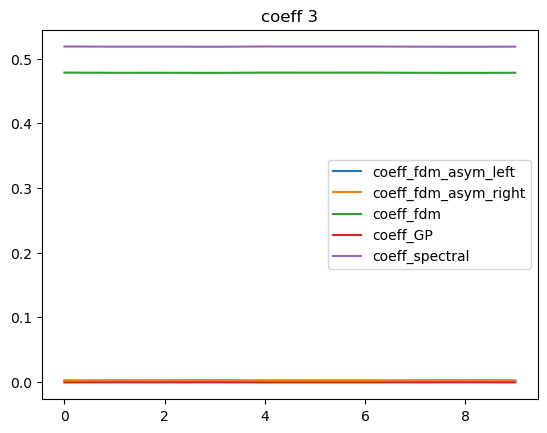

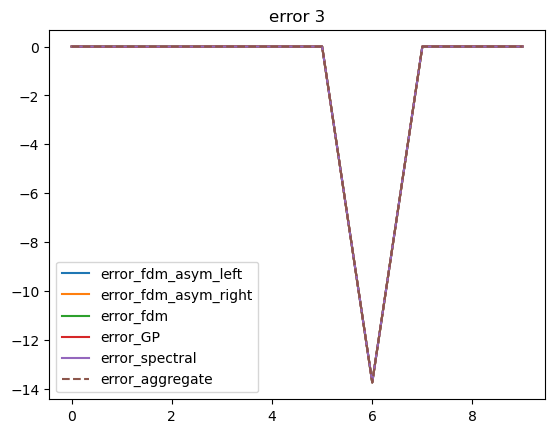

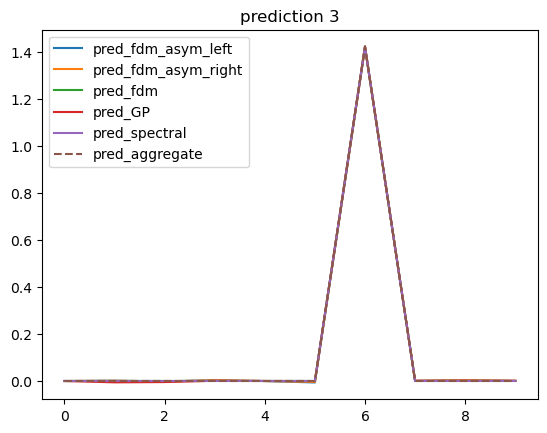

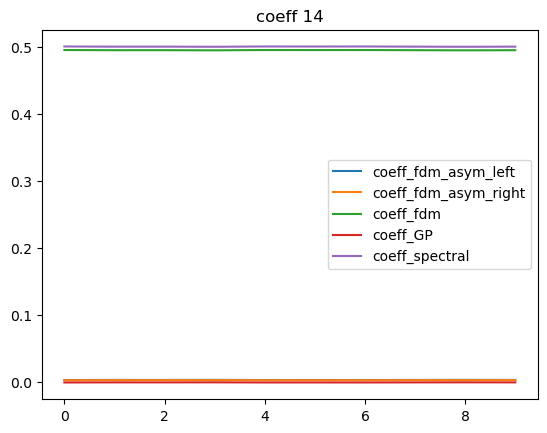

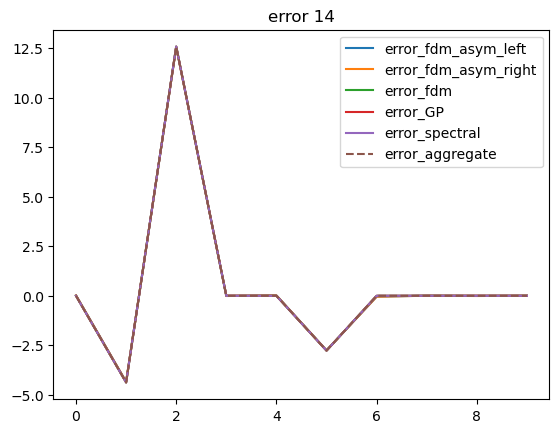

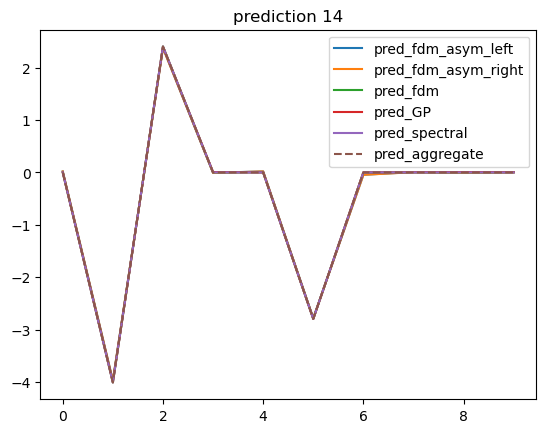

In [67]:
for freq in np.random.randint(0,50,2):
    plt.figure()
    for i in range(5):
        plt.plot(alpha_2[i,:,freq],label='coeff_'+names[i])
    plt.legend()
    plt.title(f'coeff {freq}')
    plt.figure()
    for i in range(5):
        plt.plot(model_transforms_to_test_agg[:,i,freq]-Y_components_to_test[:,freq],label='error_'+names[i])
    plt.plot(pred_2_components[:,freq]-Y_components_to_test[:,freq],label='error_aggregate',linestyle='--')
    #plt.ylim(-1,1)
    plt.legend()
    plt.title(f'error {freq}')
    plt.figure()
    for i in range(5):
        plt.plot(model_transforms_to_test_agg[:,i,freq],label='pred_'+names[i])
    plt.plot(pred_2_components[:,freq],label='pred_aggregate',linestyle='--')
    #plt.ylim(-1,1)
    plt.legend()
    plt.title(f'prediction {freq}')

In [68]:
equivalent_alpha=agg.from_components(np.einsum("ijp,jip->ijp", alpha_2, model_transforms_to_test_agg))
equivalent_alpha=equivalent_alpha/np.swapaxes(model_to_test,0,1)

/var/folders/wz/lf_5120j21q0kjn46pqx15zr0000gn/T/ipykernel_9549/1114093976.py:2: RuntimeWarning: divide by zero encountered in divide
  equivalent_alpha=equivalent_alpha/np.swapaxes(model_to_test,0,1)
/var/folders/wz/lf_5120j21q0kjn46pqx15zr0000gn/T/ipykernel_9549/1114093976.py:2: RuntimeWarning: invalid value encountered in divide
  equivalent_alpha=equivalent_alpha/np.swapaxes(model_to_test,0,1)


In [69]:
model_transforms_to_test_agg.shape

(10, 5, 59)

In [70]:
alpha_2.shape

(5, 10, 59)

In [71]:
equivalent_alpha.shape

(5, 10, 51, 51)

In [72]:
model_to_test.shape

(10, 5, 51, 51)

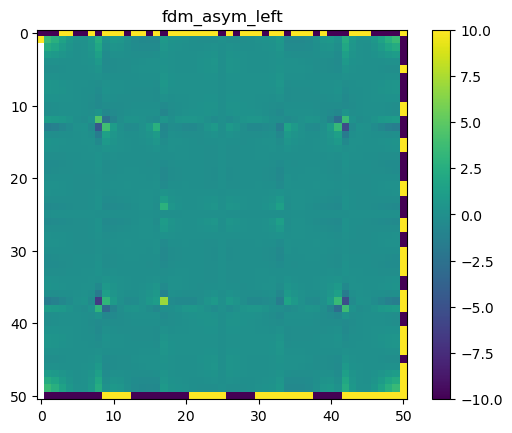

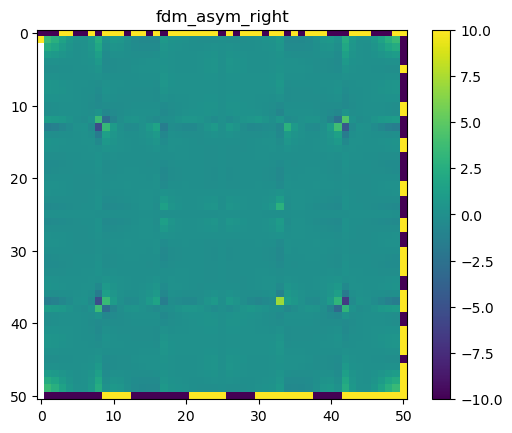

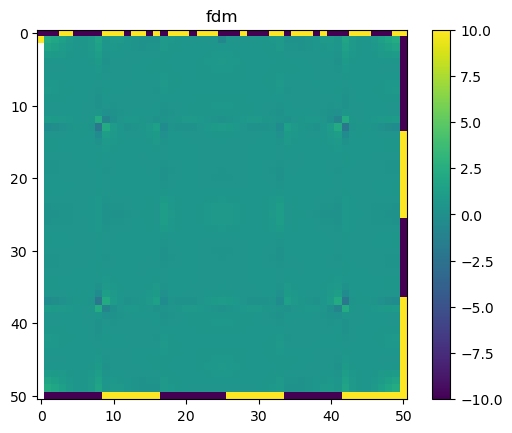

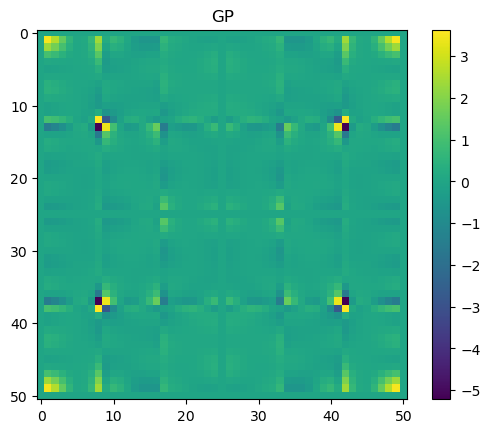

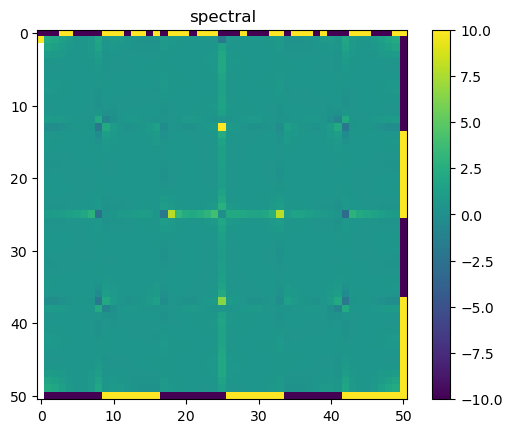

In [73]:
for i in range(5):
    plt.figure()
    plt.imshow(np.clip(equivalent_alpha[i,0].reshape(N_target+1,N_target+1),-10,10))
    plt.colorbar()
    plt.title(names[i])

In [84]:
model_to_test.shape

(10, 5, 51, 51)

In [95]:
from aggregate_solvers_pointwise import AgregatorPoint
agg_point=AgregatorPoint(K=my_kernel, solvers=solvers,kernel_name='gaussian',PCA_covariance_ratio=1-1e-6)


  0%|          | 0/2601 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(10, 2601) (5, 10, 2601) (10, 5, 2601)


  0%|          | 0/10 [00:00<?, ?it/s]

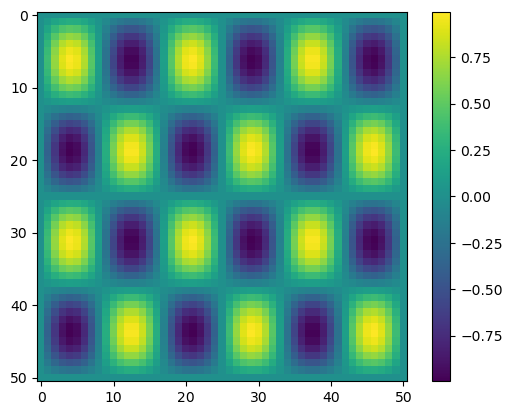

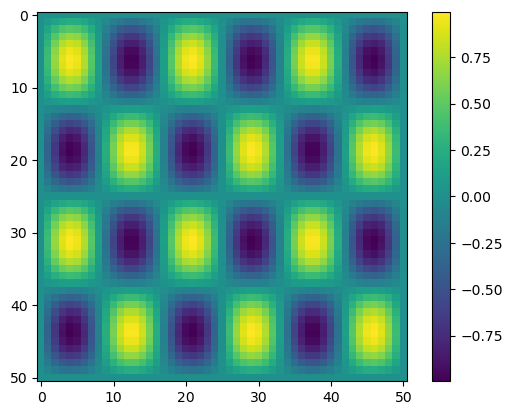

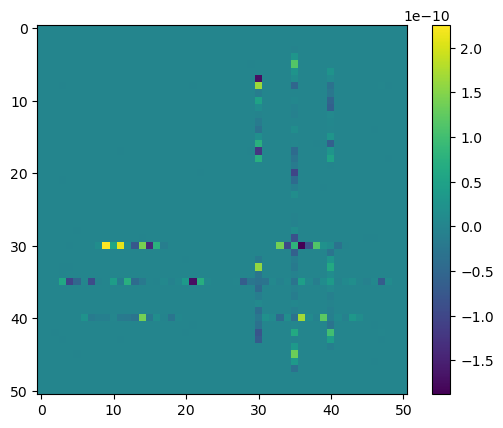

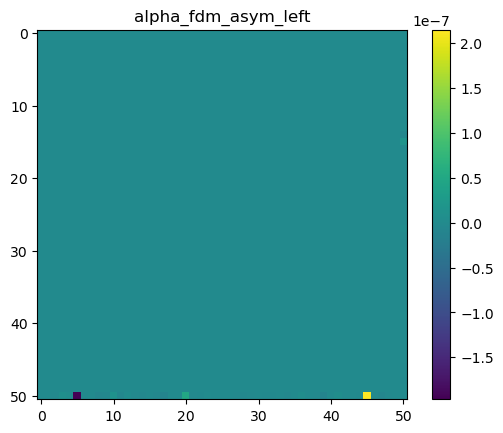

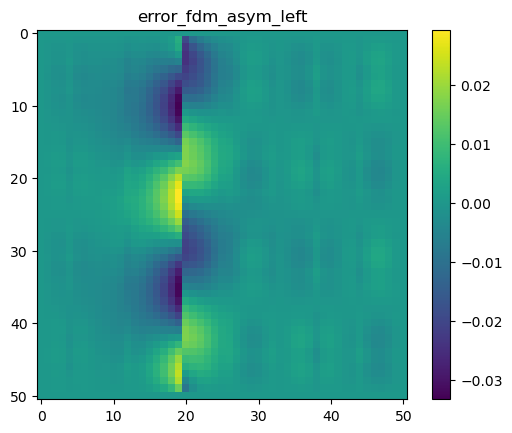

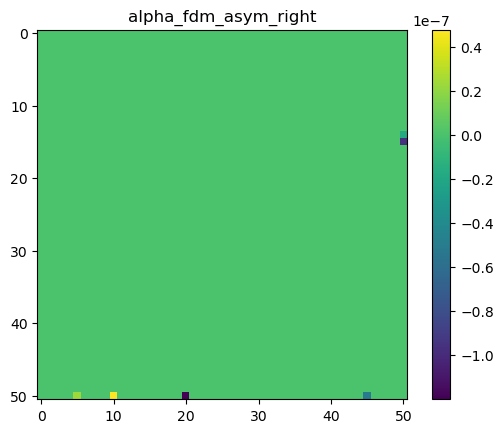

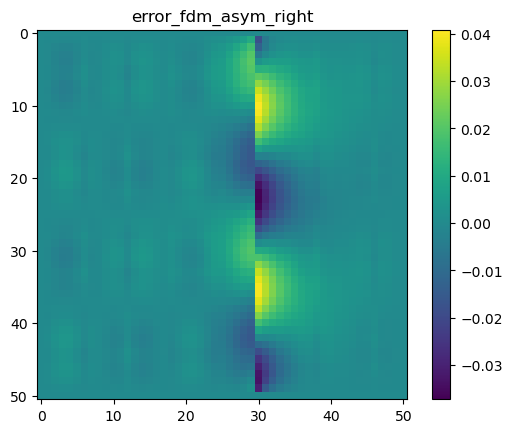

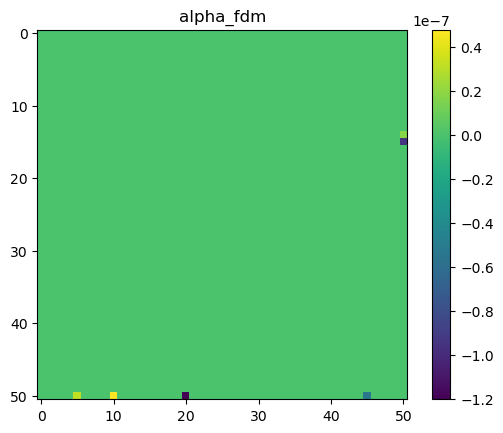

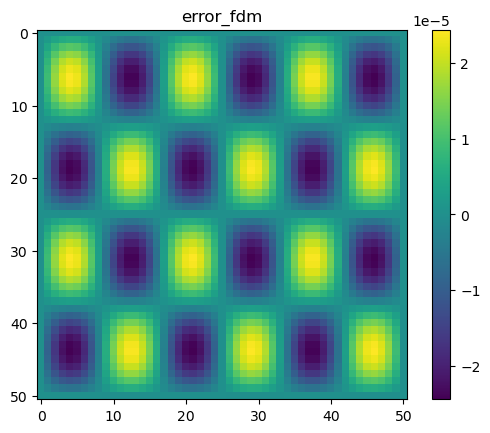

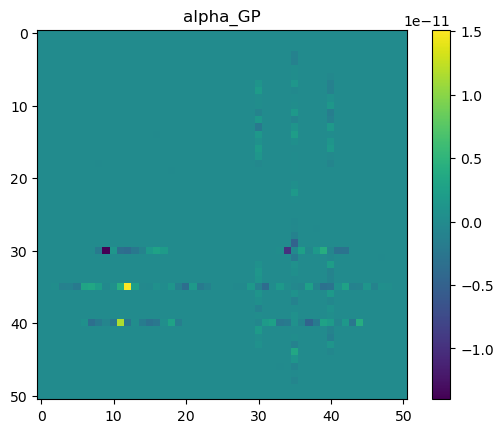

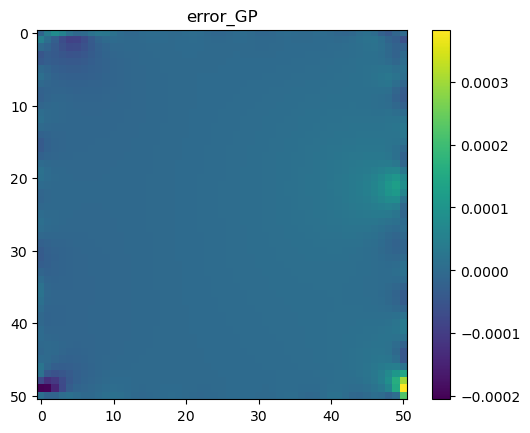

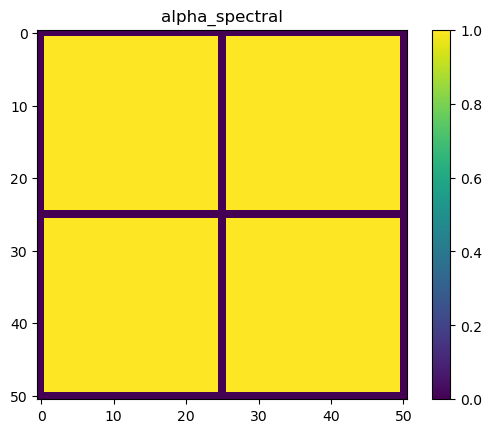

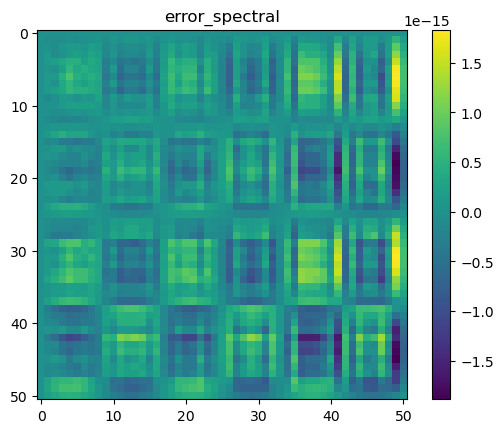

In [97]:


agg_point.fit(F,Y,cov_regularizer=100,alpha=0,eps=1e-15)
pred_2,alpha_2=agg_point(F_to_test,True)
index=0
timestep=index
plt.imshow(pred_2[index].reshape(N_target+1,N_target+1))
plt.colorbar()
plt.figure()
plt.imshow(sample_from_u(U_to_test[index],N_target))
plt.colorbar()
plt.figure()
plt.imshow(pred_2[index].reshape(N_target+1,N_target+1)-sample_from_u(U_to_test[index],N_target))
plt.colorbar()
pred_2_components=agg_point.to_components(pred_2)
model_to_test=agg_point.call_models(F_to_test)
model_transforms_to_test_agg=agg_point.to_components(model_to_test)
for i in range(5):
    plt.figure()
    plt.imshow(np.clip(alpha_2[i,index].reshape(N_target+1,N_target+1),-10,10))
    plt.colorbar()
    plt.title(f'alpha_{names[i]}')
    plt.figure()
    plt.imshow(model_to_test[index,i].reshape(N_target+1,N_target+1)-sample_from_u(U_to_test[index],N_target))
    plt.colorbar()
    plt.title(f'error_{names[i]}')